# Predicting Heart Disease -- Final

## https://www.kaggle.com/ronitf/heart-disease-uci,

## ライブラリの読み込み

In [1]:
# OS（オペレーティングシステム）に依存した機能を使うための標準ライブラリ
import os
#os.getcwd() # 現在のディレクトリを返す

In [2]:
# Library の読み込み
import sys # Pythonのインタプリタや実行環境に関する情報を扱うためのライブラリ
import pandas as pd # データを扱うための標準的なライブラリ
import numpy as np # 多次元配列を扱う数値演算ライブラリ
import scipy as sp # 高度な科学計算を行うためのライブラリ
import sklearn # 機械学習のライブラリ
import matplotlib.pyplot as plt # グラフを描画するライブラリ
%matplotlib inline
# jupyter内に描画

## データファイルの読み込

In [3]:
# CSVファイルの読み込み
df = pd.read_csv("./data/heart.csv") # df = data frame の略
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape # pandas の dataframe の行と列の表示

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## データの標準化  ⇒ これが正解率を上げるのに大きく寄与

https://helve-python.hatenablog.jp/entry/scikitlearn-scale-conversion

データの平均値と分散を変換する操作を標準化と呼ぶ。平均値を0, 分散を1とすることが多い。
変換操作は以下の式で表される。

Y=X−μσ

ここで、Yは変換後のデータ、Xは変換前のデータである。
また、μ,σは、それぞれXの平均、分散である。
Scikit-learnで標準化は、関数としてはscale, クラスとしてはStandardScalerという名前で用意されている。

https://aizine.ai/preprocessing0614/

スケール変換は個々の特徴量の平均が０、標準偏差が１になるように変換して特徴量を標準正規分布に近似する。多くの機械学習のアルゴリズムにはこのStandardScalerを用いたスケール変換の方が実用的という見方が多いです。というのは平均値０、標準偏差１となるようにスケール変換するということは特徴量が正規分布に従うようになって機械学習アルゴリズムが重みを学習しやすくなる(※)ことを意味する

In [6]:
# DataFrame.iloc[:,A:B] --> pandas のデータフレームの列を取り出す
# https://qiita.com/osk_kamui/items/0a164ec002ff6d8798ca

X = df.iloc[:,0:13].values  # 説明変数
y = df.iloc[:,13].values    # 目的変数

# 説明変数（X)のデータ標準化
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
dfNorm = pd.DataFrame(X_std, index=df.index, columns=df.columns[0:13])

# ターゲットの列をデータフレームに追加
dfNorm['target'] = df['target']

# 目的変数(y) と説明変数(X) のデータフレーム作成
X = dfNorm.iloc[:,0:13].values
y = dfNorm.iloc[:,13].values

In [7]:
# 訓練用と検証用のデータセット作成
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, y_train.shape, X_val.shape , y_val.shape

((212, 13), (212,), (91, 13), (91,))

In [8]:
# 標準化後の目的変数の表示
print("-------------------------------------------------------------------------")
print("訓練用説明変数(X_train): 標準化された数字")
print("-------------------------------------------------------------------------")
print(X_train[0:3])
print("-------------------------------------------------------------------------")
print("訓練用目的変数(y_train): ラベルの[0, 1]")
print("-------------------------------------------------------------------------")
print(y_train[0:30])
print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------
訓練用説明変数(X_train): 標準化された数字
-------------------------------------------------------------------------
[[ 0.84190778  0.68100522  0.03203122 -0.20696359 -0.73947076  2.394438
  -1.00583187 -0.42186226 -0.69663055 -0.89686172  0.97635214 -0.71442887
  -0.51292188]
 [ 1.61392956  0.68100522  1.97312292  1.62064933 -0.23700823  2.394438
  -1.00583187 -0.81543681 -0.69663055 -0.81059216 -0.64911323  0.26508221
  -0.51292188]
 [ 0.73161895  0.68100522 -0.93851463  0.47839125 -0.75879625 -0.41763453
  -1.00583187 -0.50932327  1.43548113  0.74225984  0.97635214  0.26508221
   1.12302895]]
-------------------------------------------------------------------------
訓練用目的変数(y_train): ラベルの[0, 1]
-------------------------------------------------------------------------
[1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1]
-------------------------------------------------------------------------


## データの評価：変数の相関、目的変数のPCA（主成分分析）

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


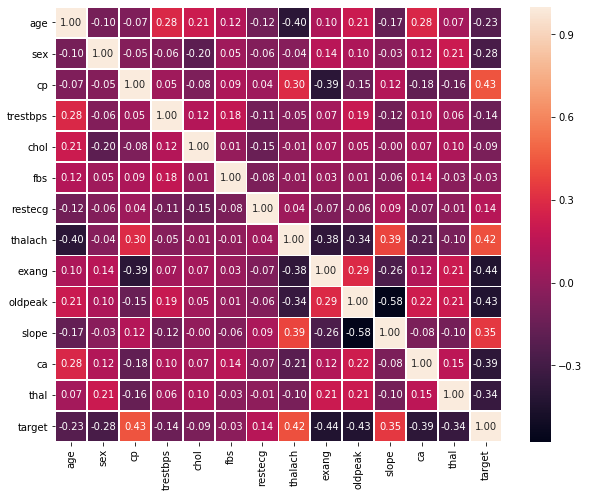

In [9]:
# 相関マトリックスの計算
corr = dfNorm.corr()

# ヒートマップのプロット
import seaborn as sns
fig = plt.figure(figsize=(10,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True,fmt='.2f',  # 係数の表示（小数点２位まで）
        linewidths=.75)

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


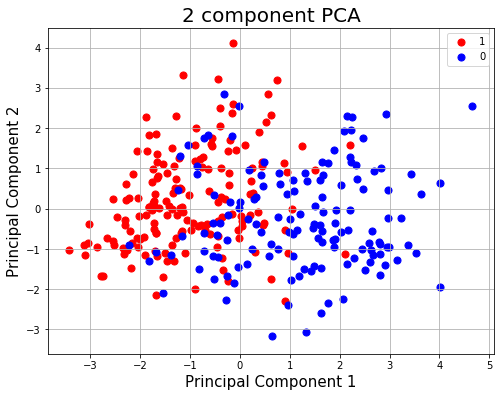

In [10]:
# 目的変数の主成分分析

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r',  'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## 関数定義（検証指数および可視化関数）

In [11]:
# 機械学習 → 検証 → 結果表示関数
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
    
def model_fit(clf, X_train, y_train, X_val, y_val): # 同じコードの重複を避けるため、関数を定義
    # モデルの学習
    clf = clf.fit(X_train, y_train)
    # 検証データで予測
    y_pred = pd.DataFrame(clf.predict(X_val))
    
    # confusion matrix（混合行列）表示
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_val, y_pred)
    print(cm)
    acc = clf.score(X_val, y_val)
    # 横軸が予想(predicted)、縦軸が実際(actual)
    print("Open Accuracy:", acc)
    
    # 混合行列の描画
    sns.set()
    cm_rate = cm / cm.sum()
    labels = ["False","True"]
    fig = plt.figure(figsize=(5, 5))
    heatmap = sns.heatmap(
        cm_rate, xticklabels=labels, yticklabels=labels,
        annot=True, fmt='.1%', cbar=True, square=True, cmap='YlGnBu')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    # Generate a classification report
    report = classification_report(y_pred, y_val, target_names=['False','True'])
    print(report)
    return

In [12]:
# ROC曲線とAUC（５回交差検証）
# https://www.kaggle.com/ronitf/predicting-heart-disease

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

def roc_graph_cv(algo_name,X,y,cvn=5):
    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_splits=cvn)
    classifier =algo_name

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X[train], y[train].ravel()).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test].ravel(), probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## 各種分類器での学習

### ランダムフォレスト（Random Forest）

[[36  8]
 [ 6 41]]
Open Accuracy: 0.8461538461538461


D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


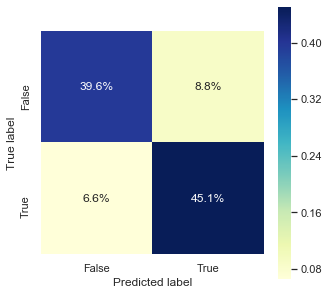

              precision    recall  f1-score   support

       False       0.82      0.86      0.84        42
        True       0.87      0.84      0.85        49

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



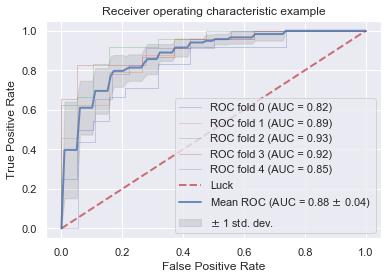

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(min_samples_leaf=3, random_state=0)
model_fit(clf, X_train, y_train, X_val, y_val)  # 関数の呼び出し
roc_graph_cv(clf, X_train, y_train) # 関数の呼び出し

### 勾配ブースティング分類（Gradient Boosting）と Adaboost

[[36  8]
 [ 4 43]]
Open Accuracy: 0.8681318681318682


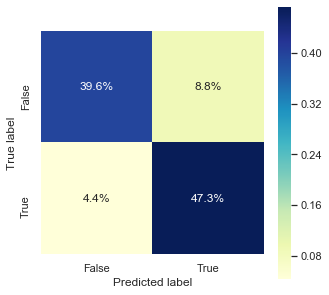

              precision    recall  f1-score   support

       False       0.82      0.90      0.86        40
        True       0.91      0.84      0.88        51

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



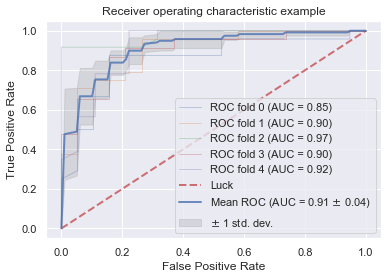

In [14]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(max_depth=1, min_samples_leaf=55, n_estimators=100)
model_fit(clf, X_train, y_train, X_val, y_val)  # 関数の呼び出し
roc_graph_cv(clf, X_train, y_train) # 関数の呼び出し

[[32 12]
 [ 4 43]]
Open Accuracy: 0.8241758241758241


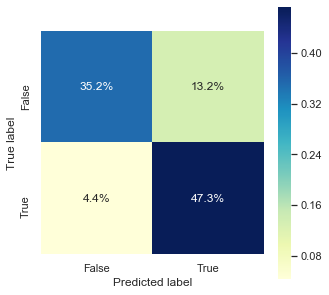

              precision    recall  f1-score   support

       False       0.73      0.89      0.80        36
        True       0.91      0.78      0.84        55

    accuracy                           0.82        91
   macro avg       0.82      0.84      0.82        91
weighted avg       0.84      0.82      0.83        91



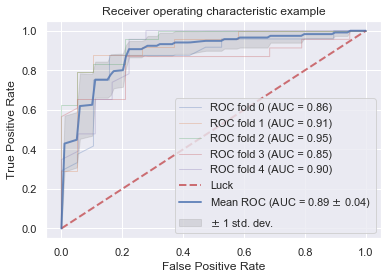

In [15]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(base_estimator=None, n_estimators=45, learning_rate=0.08, algorithm='SAMME.R', random_state=0)
model_fit(clf, X_train, y_train, X_val, y_val)  # 関数の呼び出し
roc_graph_cv(clf, X_train, y_train) # 関数の呼び出し

### Support Vector Machine

[[31 13]
 [ 6 41]]
Open Accuracy: 0.7912087912087912


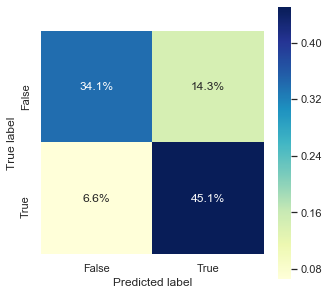

              precision    recall  f1-score   support

       False       0.70      0.84      0.77        37
        True       0.87      0.76      0.81        54

    accuracy                           0.79        91
   macro avg       0.79      0.80      0.79        91
weighted avg       0.80      0.79      0.79        91



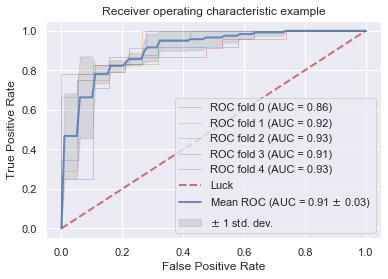

In [16]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=200, cache_size=200, gamma=0.001, tol=0.1, degree=3, 
          probability=True) # roc_graph_cv() を正常に作動差出るため probability=True に設定                             
model_fit(clf, X_train, y_train, X_val, y_val)  # 関数の呼び出し
roc_graph_cv(clf, X_train, y_train) # 関数の呼び出し

### k-NN

[[36  8]
 [ 5 42]]
Open Accuracy: 0.8571428571428571


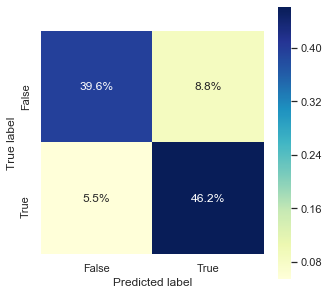

              precision    recall  f1-score   support

       False       0.82      0.88      0.85        41
        True       0.89      0.84      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



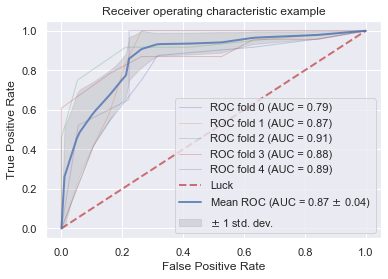

In [17]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(algorithm='brute', leaf_size=30, n_neighbors=6, p=2)
model_fit(clf, X_train, y_train, X_val, y_val)  # 関数の呼び出し
roc_graph_cv(clf, X_train, y_train) # 関数の呼び出し

### Adaboost & Bagging -- RF

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

[[31 13]
 [ 5 42]]
Open Accuracy: 0.8021978021978022


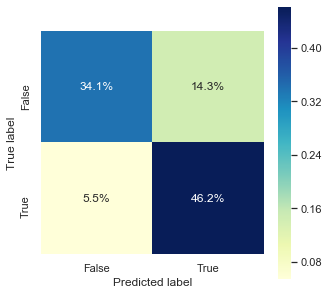

              precision    recall  f1-score   support

       False       0.70      0.86      0.78        36
        True       0.89      0.76      0.82        55

    accuracy                           0.80        91
   macro avg       0.80      0.81      0.80        91
weighted avg       0.82      0.80      0.80        91



In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(BaggingClassifier(RandomForestClassifier(),
                         n_estimators=30, random_state=0), n_estimators=30, random_state=0) 
model_fit(clf, X_train, y_train, X_val, y_val)  # 関数の呼び出し

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar_3.6_GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators

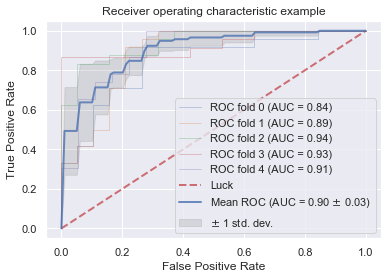

In [19]:
roc_graph_cv(clf, X_train, y_train) # 関数の呼び出し

## Searquential Feature Selector (Forward Selection)

In [21]:
# https://aotamasaki.hatenablog.com/entry/2018/06/14/235157

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# conda install mlxtend

clf = GradientBoostingClassifier(max_depth=1, min_samples_leaf=55, n_estimators=100)
sfs1 = SFS(clf, # 使う学習器
           k_features=7, #特徴をいくつまで選択するか
           forward=True, #Trueでforward selectionになる。Falseでback
           floating=False, #後に説明するが、forward selectionの亜種を行うためのもの。
           verbose=2, #実行時のlogをどれだけ詳しく表示するか
           scoring='accuracy', # 評価指標
           cv=5) #クロスバリデーション
            #ちなみにクロスバリデーションをしない(cv=0)とすると、最終的に選ばれる特徴が変わります。

sfs1 = sfs1.fit(X, y)
sfs1.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.4s finished

[2019-10-23 09:36:42] Features: 1/7 -- score: 0.7590710382513661[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.3s finished

[2019-10-23 09:36:43] Features: 2/7 -- score: 0.7656830601092895[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.2s finished

[2019-10-23 09:36:44] Features: 3/7 -- score: 0.8185792349726777[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

{1: {'feature_idx': (2,),
  'cv_scores': array([0.7704918 , 0.7704918 , 0.73770492, 0.78333333, 0.73333333]),
  'avg_score': 0.7590710382513661,
  'feature_names': ('2',)},
 2: {'feature_idx': (2, 9),
  'cv_scores': array([0.75409836, 0.80327869, 0.73770492, 0.78333333, 0.75      ]),
  'avg_score': 0.7656830601092895,
  'feature_names': ('2', '9')},
 3: {'feature_idx': (2, 9, 11),
  'cv_scores': array([0.81967213, 0.81967213, 0.78688525, 0.93333333, 0.73333333]),
  'avg_score': 0.8185792349726777,
  'feature_names': ('2', '9', '11')},
 4: {'feature_idx': (2, 9, 11, 12),
  'cv_scores': array([0.85245902, 0.86885246, 0.81967213, 0.85      , 0.78333333]),
  'avg_score': 0.8348633879781421,
  'feature_names': ('2', '9', '11', '12')},
 5: {'feature_idx': (2, 6, 9, 11, 12),
  'cv_scores': array([0.85245902, 0.90163934, 0.83606557, 0.85      , 0.78333333]),
  'avg_score': 0.8446994535519126,
  'feature_names': ('2', '6', '9', '11', '12')},
 6: {'feature_idx': (2, 6, 9, 10, 11, 12),
  'cv_scor

[[36  8]
 [ 5 42]]
Open Accuracy: 0.8571428571428571


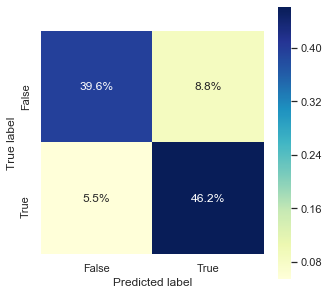

              precision    recall  f1-score   support

       False       0.82      0.88      0.85        41
        True       0.89      0.84      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



In [22]:
# 上位７変数で機械学習
currlist =[1, 2, 6, 9, 10, 11, 12]
model_fit(clf, X_train[:,currlist], y_train, X_val[:,currlist], y_val)  # 関数の呼び出し

## 説明変数の重要度のグラフ化

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Random Forest モデルの作成
clf = GradientBoostingClassifier(max_depth=1, min_samples_leaf=55, n_estimators=100)
# モデルの学習
clf = clf.fit(X, y)

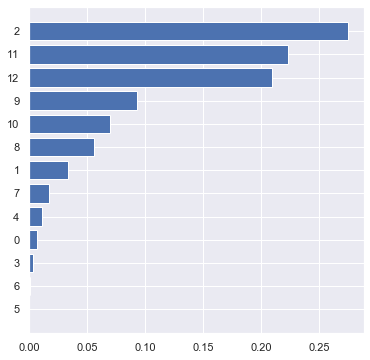

In [24]:
# 説明変数の重要度のグラフ化
import matplotlib.pyplot as plt
%matplotlib inline

# numpy配列から pandas のデータフレームに変換
X_df = pd.DataFrame(X)

features = X_df.columns
importances = clf.feature_importances_ # 説明変数の重要度を抽出
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

[[35  9]
 [ 5 42]]
Open Accuracy: 0.8461538461538461


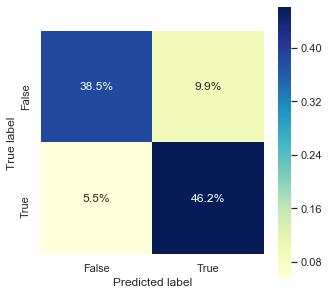

              precision    recall  f1-score   support

       False       0.80      0.88      0.83        40
        True       0.89      0.82      0.86        51

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [25]:
# 上位７変数で機械学習
currlist =[1, 2, 8, 9, 10, 11, 12]
model_fit(clf, X_train[:,currlist], y_train, X_val[:,currlist], y_val)  # 関数の呼び出し